In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import seaborn as sns
from scipy import stats

### Open up File

<b>Note :</b>
Before proceeding please change the path to match your file location

In [2]:
path = '/home/acer/Documents/GRAB/safety.zip'

# this function iterate over the zip file then combine the csv
# not that this is only the feature not the labels
# i am doing this because the number of features didn't match up with number of labels
def openfile(path):
    dvs = []
    zf = zipfile.ZipFile(path)
    # iterate over the zip file then store it to a list
    for csv in zf.infolist():
        if ('__MACOSX' not in (csv.filename)) & csv.filename.endswith('.csv'):
            try:
                dvs.insert( int(csv.filename[25]), pd.read_csv(zf.open(csv.filename)))
            except ValueError:
                dvs.insert(10,pd.read_csv(zf.open(csv.filename)))

    # After that the data is merged into one big data frame
    x = pd.DataFrame()
    for i in range(0,10):
        x = x.append(dvs[i])
    # this will return data and labels
    return x, dvs[10]

In [3]:
data, labels = openfile(path)

In [4]:
# now since the labels has some duplicate
dup = labels['bookingID'].value_counts()
dup_lab = labels.loc[labels.bookingID.isin(dup.index[dup.gt(1)]), 'bookingID'].unique()
labels.loc[labels.bookingID.isin(dup.index[dup.gt(1)])].sort_values(by = 'bookingID')
# well turn out the labels are all different

bookingID  label
12602             13      1
12463             13      0
2351    154618822837      1
5295    154618822837      0
11215   223338299461      1
6212    223338299461      0
19936   395136991308      0
6121    395136991308      1
17623   403726925929      1
8472    403726925929      0
2858    455266533495      1
10778   455266533495      0
18027   481036337234      0
11058   481036337234      1
17843   515396075694      1
16462   515396075694      0
17001   695784702084      1
10880   695784702084      0
18951   919123001348      0
11133   919123001348      1
2721    970662608932      0
13634   970662608932      1
6168   1279900254294      1
6210   1279900254294      0
16990  1348619731077      0
3068   1348619731077      1
14942  1391569403991      1
9979   1391569403991      0
9483   1408749273124      0
16340  1408749273124      1
1256   1511828488211      1
6516   1511828488211      0
14432  1632087572573      0
1059   1632087572573      1
19453  1649267441751      0
13688  1649267441751      1

In [5]:
# i decide to replace them with 1 since the amount of 0 is too many
labels = labels.drop_duplicates('bookingID')
labels.loc[labels['bookingID'].isin(dup_lab), 'label'] = 1
labels.set_index('bookingID', inplace = True)

### Below is the analysis part

In [18]:
# Some general statistics about this data
data.drop('bookingID', axis=1).describe()

Accuracy       Bearing  acceleration_x  acceleration_y  \
count  1.613556e+07  1.613556e+07    1.613556e+07    1.613556e+07   
mean   1.161035e+01  1.689684e+02    6.914529e-02    4.468976e+00   
std    8.691672e+01  1.072966e+02    1.424161e+00    8.130664e+00   
min    7.500000e-01  0.000000e+00   -7.841969e+01   -7.299412e+01   
25%    3.900000e+00  7.800000e+01   -5.081238e-01   -2.022476e+00   
50%    4.250000e+00  1.688700e+02    6.137085e-02    9.081485e+00   
75%    8.000000e+00  2.629840e+02    6.350620e-01    9.709778e+00   
max    6.070101e+03  3.599995e+02    6.687346e+01    7.505589e+01   

       acceleration_z        gyro_x        gyro_y        gyro_z        second  \
count    1.613556e+07  1.613556e+07  1.613556e+07  1.613556e+07  1.613556e+07   
mean     8.942974e-01 -1.710847e-03  2.800733e-04 -2.569688e-04  3.803484e+03   
std      3.251549e+00  1.445619e-01  3.400630e-01  1.480824e-01  1.436686e+06   
min     -7.844842e+01 -4.845575e+01 -7.488861e+01 -5.355445e+01  0.000000e+00   
25%     -9.316101e-01 -2.678888e-02 -2.993851e-02 -1.876500e-02  2.410000e+02   
50%      7.757450e-01 -6.432411e-04  2.645046e-04 -3.542004e-05  5.200000e+02   
75%      2.750938e+00  2.330639e-02  3.143085e-02  1.823425e-02  8.630000e+02   
max      7.805576e+01  3.983975e+01  8.031496e+01  6.630078e+01  1.495797e+09   

              Speed  
count  1.613556e+07  
mean   9.006543e+00  
std    8.106415e+00  
min   -2.000000e+00  
25%    1.020000e+00  
50%    7.530000e+00  
75%    1.548000e+01  
max    1.480186e+02

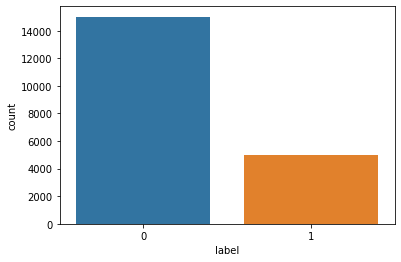

In [166]:
sns.countplot(labels['label'])

It's clear that this data is unbalanced thus some method might need to be applied to tackle this problem

In [7]:
len(data.columns)

11

Looking at this data we can see some outliers are present. for those that the maximum value differ to much then the 75% quartile i might either make it categorical or i will transform them.

In [7]:
data['bookingID'].value_counts()

438086664371     7561
1374389534819    4499
34359738469      4302
1108101562533    3925
747324309632     3674
1486058684448    3611
893353197656     3486
1211180777592    3206
1365799600208    3195
120259084461     3172
412316860458     3061
1116691497104    3055
1262720385148    3026
515396075652     2996
1194000908355    2981
953482739722     2929
695784702068     2917
1116691497088    2909
283467841668     2893
77309411460      2868
841813590038     2837
1709396983933    2835
841813590125     2828
841813590042     2815
1700807049324    2790
1065151889429    2788
1125281431586    2774
1159641169935    2755
670014898333     2712
1211180777501    2706
                 ... 
1589137899664     120
575525617679      120
1288490188981     120
515396075679      120
60129542207       120
1348619730958     120
764504178845      120
309237645388      120
25769803813       120
343597383756      120
1228360646706     120
103079215187      120
149               120
558345748556      120
8504035247

We can conclude the number of bookingID are 20000. I decide to make this a big numpy tensor though i am not really sure. Therefore i think about split my method into two. First, by seeing this as a sequential data that i store as a numpy tensor and just by using basic stat of the features alongside some feautre engineering.

In [53]:
# now i am going to plot each feature distribution in hope of getting new feature and also recognizing the feature that
# needs some preprocessing
def distribution(data, k, l):
    x = list(data.columns)
    if 'bookingID' in x:
        x.remove('bookingID')
    f, ax = plt.subplots(k,l, figsize = (30,17))
    i = 0
    j = 0
    for index in x:
        sns.distplot(data[index], ax = ax[i,j])
        j += 1
        if j  == l:
            i += 1
            j = 0
    f.legend()

No handles with labels found to put in legend.


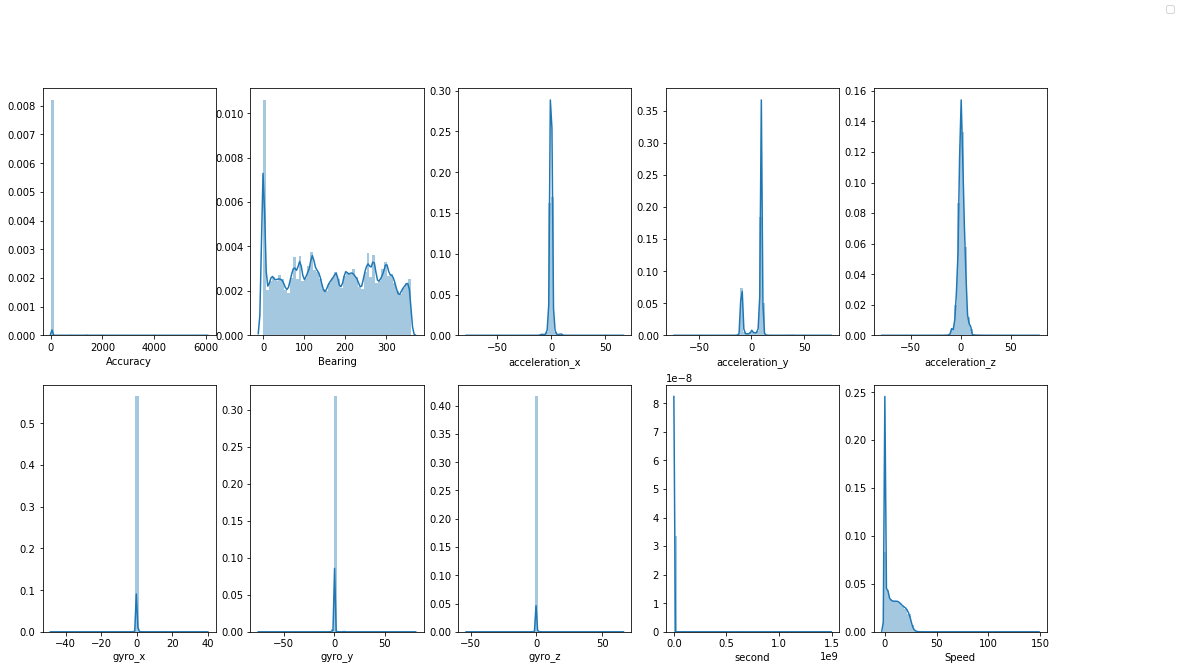

In [36]:
distribution(data)

both accuracy and speed are skewed. While bearing have this noisy distribution, I think applying logarithmic transformation might help to normalize the data

No handles with labels found to put in legend.


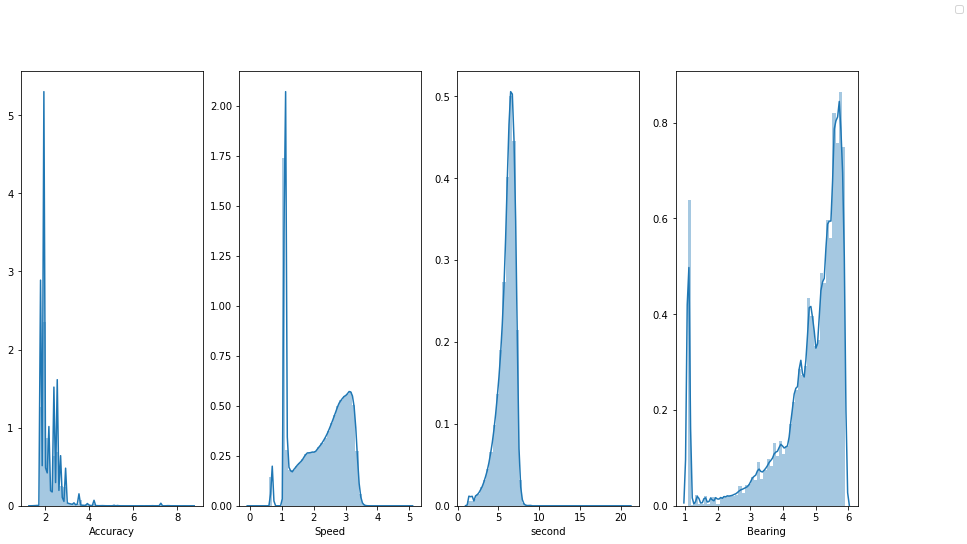

In [97]:
x = ['Accuracy', 'Speed', 'second', 'Bearing']
f, ax = plt.subplots(1,4, figsize = (15,8))
j = 0
for index in x:
    sns.distplot(np.log(data[index]+3), ax = ax[j])
    j += 1
f.legend()

Well it's not quite great looking. Now i will do the data seperation and perform seperate feature engineering.

In [10]:
# i am going to get the aggregated self.data frames
# let's think about what we usually know in physics for mechanical motion
class aggregated_table():
        """" This class will return the aggregated data frame. It assume the input data is sequential. This function only takes one input
             value which is the data. After calling aggregated_table(data), the aggregated table will be returned by calling the function
             find_seq_angle(). The physics feature can be disabled by passing physics = False in find_seq_angle()"""
        def __init__(self, data):
            self.data = data
        
        def physics(self):
            # this function create physics feature
            self.data['acc_total'] = np.sqrt(self.data['acceleration_x']**2+self.data['acceleration_y']**2+self.data['acceleration_z']**2)
            self.data['gyro_total'] = np.sqrt(self.data['gyro_x']**2+self.data['gyro_y']**2+self.data['gyro_z']**2)
            self.data['distance'] = np.abs(self.data['Speed']*self.data['second'])
            self.data['psi'] = np.arctan(self.data['acceleration_y']/self.data['acceleration_x'])
            self.data['theta'] = np.arctan(self.data['acceleration_z']/np.sqrt(self.data['acceleration_x']**2+self.data['acceleration_y']**2)) 

        # The functions that start with find calculate the difference between the n+1 and n row
        # I calculate this with assumption that the data is sequential
        def find_highest_diff(self, x):
            return np.max(x.diff(-1))
        
        def find_mean_diff(self,x):
            return np.mean(x.diff(-1))
        
        def find_std_diff(self,x):
            return np.mean(x.diff(-1))
        
        # This function calculate the angle between current vector and the next vector
        # turn out i need to make two seperate function since i can't modify the name
        def acc_find_seq_angle(self, x):
            y = pd.DataFrame(x)
            x = x[:-1]
            length_x = np.linalg.norm(x, axis =1)
            x = x.T
            y['new'] = range(1, len(y)+1)
            y.iloc[0, 3] = len(y)+2 
            y = y.sort_values('new').drop('new', axis =1)
            y = y.as_matrix()
            y = y[:-1]
            length_y = np.linalg.norm(y, axis=1)
            v = np.dot(y,x).diagonal()
            cos = v/(length_x*length_y)
            return pd.Series({'acc_ang_max': np.max(cos), 'acc_ang_mean': np.mean(cos), 'acc_ang_std': np.std(cos), 
                              'acc_ang_q1': np.quantile(cos, .25), 'acc_ang_q3': np.quantile(cos, .75),
                              'acc_ang_median': np.quantile(cos, .50), 'acc_ang_skew': stats.skew(cos),
                              'acc_ang_kurt': stats.kurtosis(cos)})
        
        def gyro_find_seq_angle(self, x):
            y = pd.DataFrame(x)
            x = x[:-1]
            length_x = np.linalg.norm(x, axis =1)
            x = x.T
            y['new'] = range(1, len(y)+1)
            y.iloc[0, 3] = len(y)+2 
            y = y.sort_values('new').drop('new', axis =1)
            y = y.as_matrix()
            y = y[:-1]
            length_y = np.linalg.norm(y, axis=1)
            v = np.dot(y,x).diagonal()
            cos = v/(length_x*length_y)
            return pd.Series({'gyro_ang_max': np.max(cos), 'gyro_ang_mean': np.mean(cos), 'gyro_ang_std': np.std(cos), 
                              'gyro_ang_q1': np.quantile(cos, .25), 'gyro_ang_q3': np.quantile(cos, .75),
                              'gyro_ang_median': np.quantile(cos, .50), 'gyro_ang_skew': stats.skew(cos),
                              'gyro_ang_kurt': stats.kurtosis(cos)})
        
        # this is the main function that aggregate the data and return the aggregated dataframe
        def Aggregated(self, physics = True):
            if physics == True: self.physics()
            col = list(self.data.columns)
            col.remove('bookingID')
            aggregations = {}
    
            for index in col:
                x = {'%s'%(index): {
                        '%s_seq_max_diff'%(index) : lambda g: self.find_highest_diff(g),
                        '%s_seq_mean_diff'%(index): lambda g: self.find_mean_diff(g),
                        '%s_seq_std_diff'%(index) : lambda g: self.find_std_diff(g),
                        '%s_mean'%(index) : 'mean',
                        '%s_std' %(index) : 'std',
                        '%s_max' %(index) : 'max',
                        '%s_q1'%(index) : lambda g: g.quantile(.25),
                        '%s_q3'%(index) : lambda g: g.quantile(.75),
                        '%s_median' %(index): 'median',
                        '%s_highestdiff'%(index) : lambda g: g.max()-g.min(),
                        '%s_skew'%(index) : 'skew',
                        '%s_kurt'% (index) : lambda g: stats.kurtosis(g)
                    }}
                aggregations.update(x)
            agg_dat = self.data.groupby('bookingID').agg(aggregations)
            agg_dat.columns = agg_dat.columns.droplevel(0)
            agg_dat2 = self.data.groupby('bookingID')[['acceleration_x', 'acceleration_y', 'acceleration_z']].apply(self.acc_find_seq_angle)
            agg_dat = agg_dat.join(agg_dat2)
            agg_dat['count'] = self.data['bookingID'].value_counts()
            agg_dat3 = self.data.groupby('bookingID')[['gyro_x', 'gyro_y', 'gyro_z']].apply(self.gyro_find_seq_angle)
            agg_dat = agg_dat.join(agg_dat3)
            return agg_dat
        

In [14]:
# make the aggregated table
cl_aggregated_table = aggregated_table(data)
agg_table = cl_aggregated_table.Aggregated()

/home/acer/.local/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/l

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/l

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarnin

/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/l

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/l

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/l

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykern

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/home/acer/.local/lib/python3.6/site-packages/numpy/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/acer/.local/lib/

In [15]:
agg_table.shape

(20000, 197)

In [16]:
agg_table.isnull().sum().sort_values()

Accuracy_seq_max_diff             0
acc_total_seq_std_diff            0
acc_total_mean                    0
acc_total_std                     0
acc_total_max                     0
acc_total_q1                      0
acc_total_q3                      0
acc_total_median                  0
acc_total_highestdiff             0
acc_total_skew                    0
acc_total_kurt                    0
gyro_total_seq_max_diff           0
gyro_total_seq_mean_diff          0
gyro_total_seq_std_diff           0
gyro_total_mean                   0
gyro_total_std                    0
gyro_total_max                    0
gyro_total_q1                     0
gyro_total_q3                     0
gyro_total_median                 0
acc_total_seq_mean_diff           0
acc_total_seq_max_diff            0
Speed_kurt                        0
Speed_skew                        0
second_seq_mean_diff              0
second_mean                       0
second_std                        0
second_max                  

In [217]:
# i fill na with big negative value since it likely happen because 0 division
agg_table = agg_table.fillna(-99999999)
# now i am going to export the aggregated table to save time for future analysis or training
agg_table.to_csv('agg_table.csv')

In [18]:
# okay turn out there is no problems
agg_table = agg_table.join(labels)

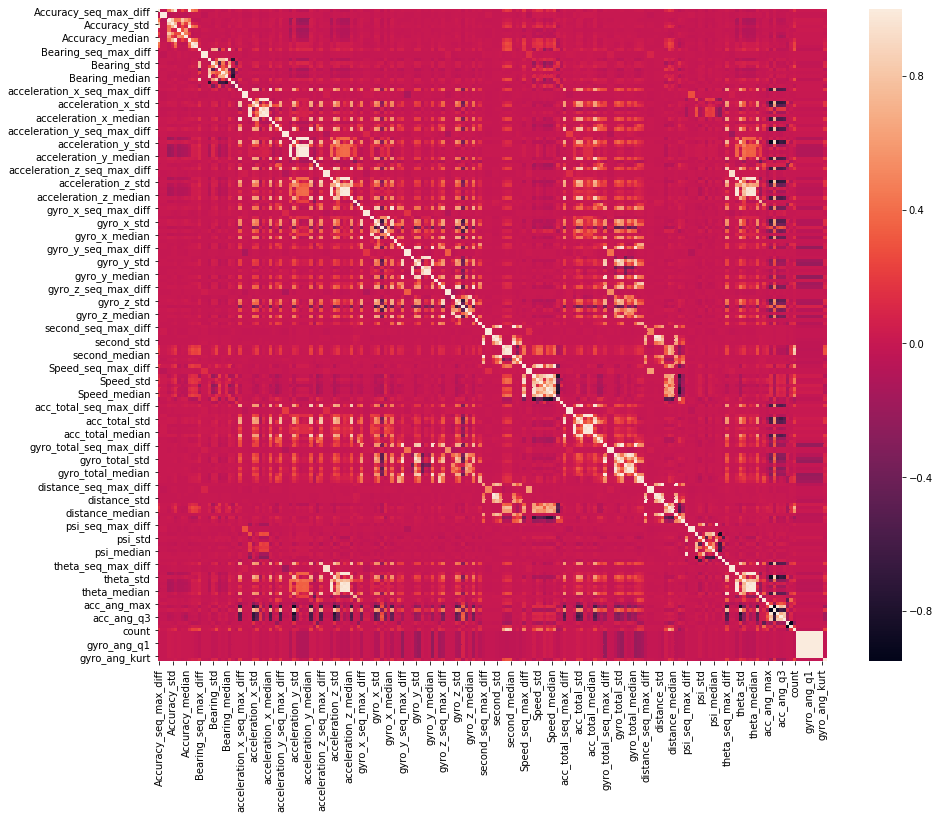

In [19]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(agg_table.corr() ,ax = ax)

Some values has quite high correleation this can be problematic later on. I am thinking about looking at the feature importance or doing some PCA to reduce the feature and hopefully increasing the ROC-AUC. I also haven't look at the distribution with the labels. Which i will do below

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Feature ranking:
1. feature 103 (0.017007)
2. feature 104 (0.015952)
3. feature 188 (0.012757)
4. feature 102 (0.011586)
5. feature 151 (0.009464)
6. feature 96 (0.008940)
7. feature 100 (0.008720)
8. feature 101 (0.008717)
9. feature 105 (0.008580)
10. feature 99 (0.008364)
11. feature 149 (0.007723)
12. feature 144 (0.007531)
13. feature 153 (0.007439)
14. feature 177 (0.007277)
15. feature 168 (0.007138)
16. feature 12 (0.007075)
17. feature 116 (0.006852)
18. feature 148 (0.006633)
19. feature 57 (0.006551)
20. feature 108 (0.006541)
21. feature 16 (0.006508)
22. feature 111 (0.006486)
23. feature 21 (0.006370)
24. feature 152 (0.006354)
25. feature 181 (0.006283)
26. feature 106 (0.006274)
27. feature 114 (0.006204)
28. feature 124 (0.006197)
29. feature 115 (0.006187)
30. feature 117 (0.006169)
31. feature 113 (0.005966)
32. feature 45 (0.005959)
33. feature 107 (0.005902)
34. feature 112 (0.005896)
35. feature 40 (0.005756)
36. feature 147 (0.005742)
37. feature 172 (0.005730)
3

(-1, 197)

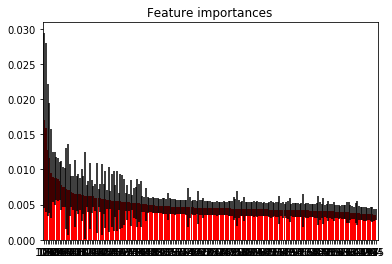

In [20]:
# looking at the feature importance
# the code is from scikit learn documentation
# i will plot the top 20 feature distribution and think about what to do with them after
# the feature has close importance so i think not to omit the feature now
from sklearn.ensemble import ExtraTreesClassifier

X = agg_table.drop('label', axis= 1).as_matrix()
y = agg_table[['label']]

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

In [214]:

# i will plot the top 40 feature in the data
# the 0 and 1 have different color to make feature significant more present
def stacked_plot_4 (data, column, k, l):
    i = 0
    j = 0
    fig = plt.figure(figsize = (15,8*4))
    for col in column:
        ax = plt.subplot2grid((k,l), (i,j))
        ax.hist([data[data.label==1][col], data[data.label==0][col]], stacked = True)
        ax.set_title(str(col))
        j+=1
        if j == l:
            i+=1
            j = 0

    plt.tight_layout()


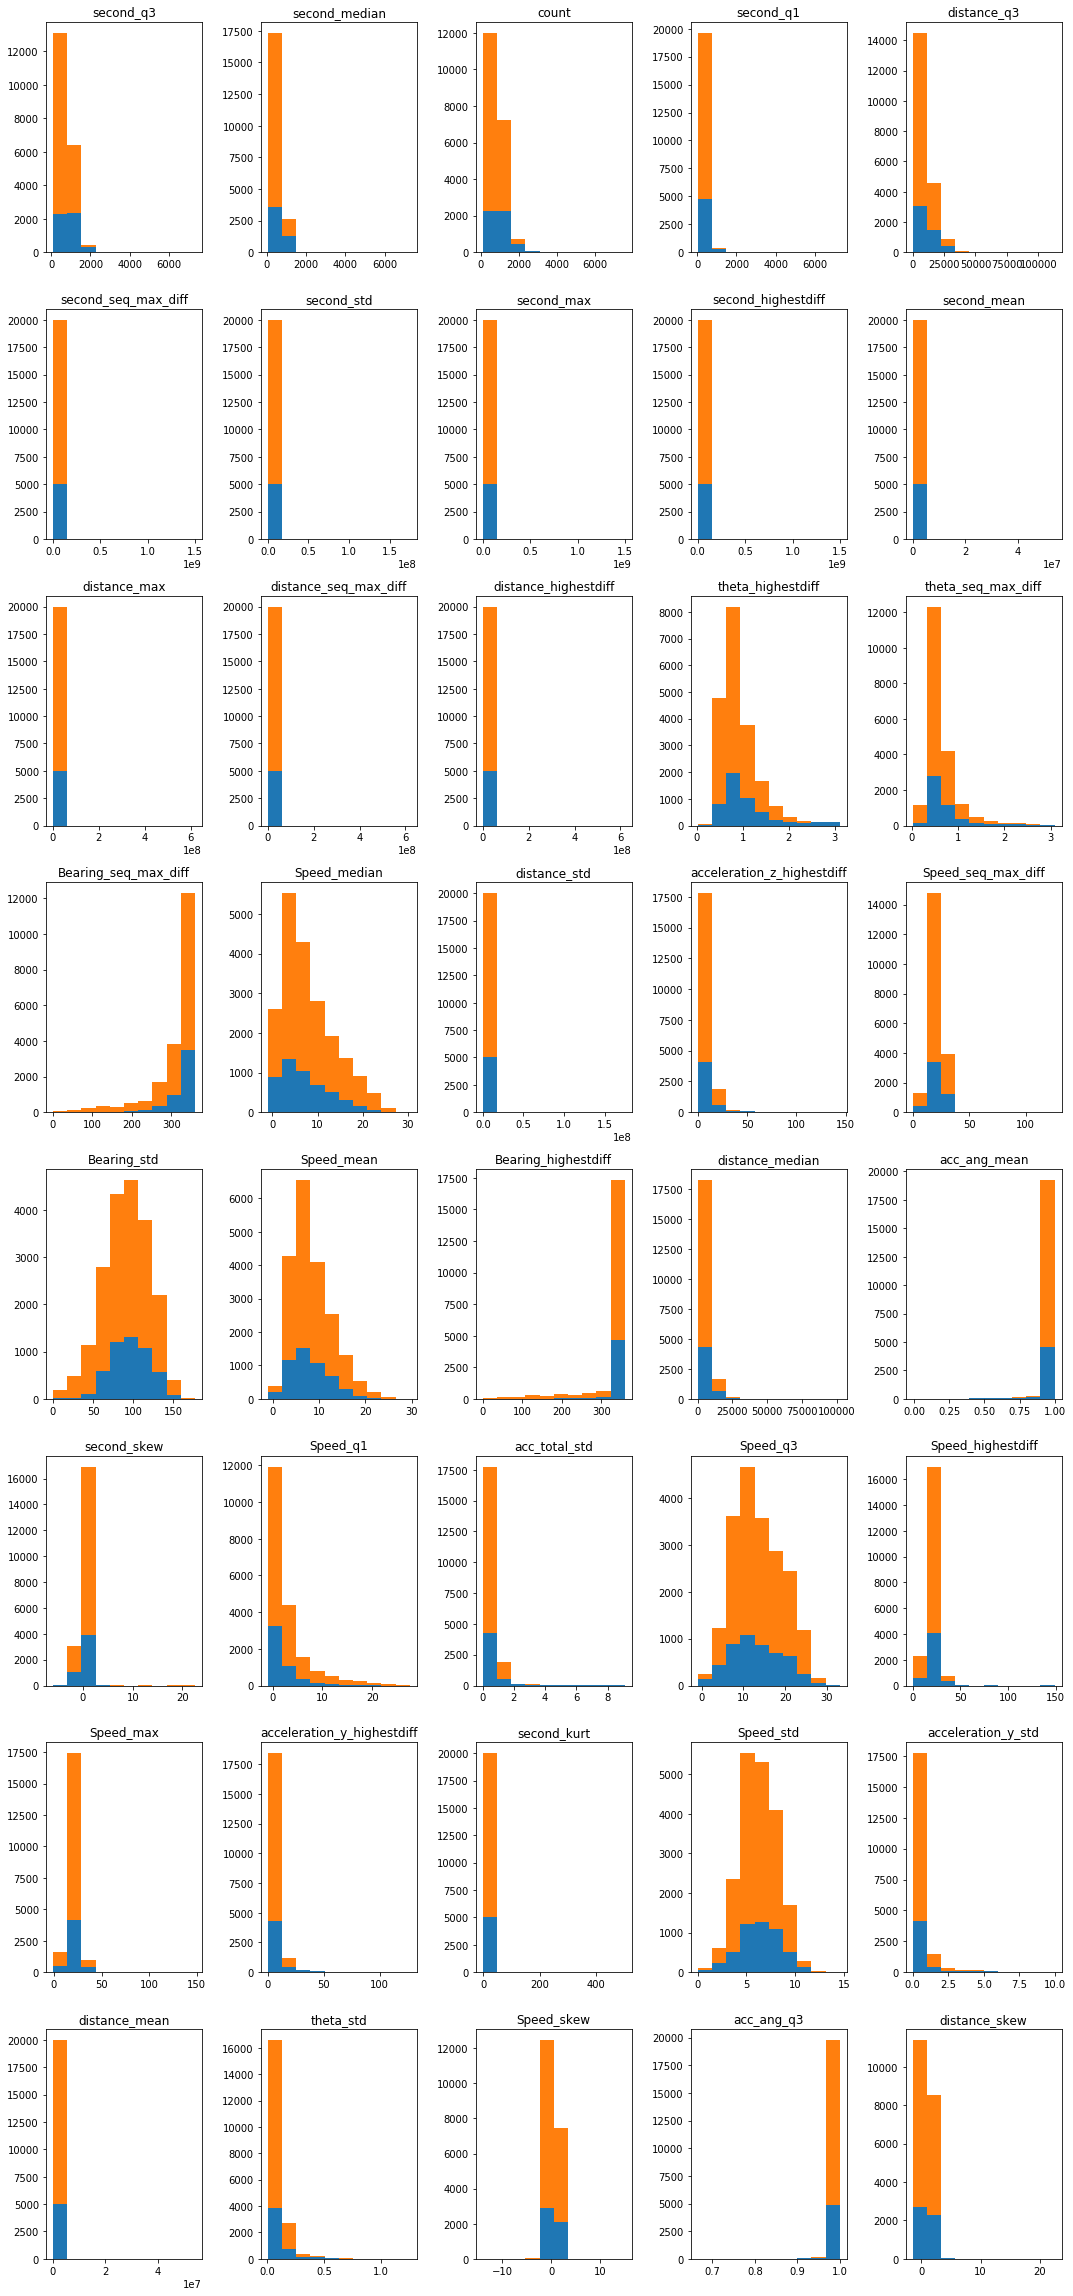

In [216]:
column = agg_table.iloc[:, indices[0:40]]
stacked_plot_4(agg_table, column, 8, 5)

Some of the most important feature is second related. Which actually highly correlated with second. This might indicate the following:
- the longer you ride, the higher your risk
- Drivers prefer having a lot of order with small distance rather than one long distance order. Thus, when getting one long order they want to finish it as quickly as possible which result in reckless driving

Another interesting feature which show to be important is theta_seq_max_diff. Which higher values indicate steeper change in direction. This is actually make sense given reckless driving can be known just by loking at how the driver turn. Looking at the distribution 

After looking at the distribution i can't find any obvious features that give obvious pattern, such that the distribution of dangerous driving and safe driving is different. Which kind of give me clue that linear classifier is definitely not enough

In [221]:
# i will select which feature might need treatment
# though the treatments is model dependent
# i actually have plot the feature importance without adding physics() function
# but due to it takes too much memory i only show the plot with physics
feature_treat = ['acceleration_x_kurt', 'gyro_x_max', 'Speed_kurt', 'gyro_x_std', 'Bearing_max', 
                 'acceleration_x_highestdiff', 'acceleration_x_max', 'acceleration_x_std', 'acceleration_z_seq_max_diff',
                 'acceleration_y_std', 'acceleration_z_std', 'Bearing_highestdiff', 'acceleration_z_max', 'second_skew',
                 'acceleration_y_highestdiff', 'acceleration_z_highestdiff', 'second_q3', 'second_median', 'count', 'second_q1',
                 'second_highestdiff', 'second_std', 'second_max', 'second_mean', 'second_seq_max_diff', 'Bearing_seq_max_diff',
                 'distance_max', 'distance_seq_max_diff', 'distance_highestdiff', 'acc_ang_q1', 'distance_kurt', 'acc_ang_q3']

In [226]:
# by looking at describe the lowest value is 10
# to prevent log 0 or negative log i add all of the column with 10
# i also check wether null value presents. The result is null
np.log(agg_table[feature_treat]+10).isnull().sum

acceleration_x_kurt            0
gyro_x_max                     0
Speed_kurt                     0
gyro_x_std                     0
Bearing_max                    0
acceleration_x_highestdiff     0
acceleration_x_max             0
acceleration_x_std             0
acceleration_z_seq_max_diff    0
acceleration_y_std             0
acceleration_z_std             0
Bearing_highestdiff            0
acceleration_z_max             0
second_skew                    0
acceleration_y_highestdiff     0
acceleration_z_highestdiff     0
second_q3                      0
second_median                  0
count                          0
second_q1                      0
second_highestdiff             0
second_std                     0
second_max                     0
second_mean                    0
second_seq_max_diff            0
Bearing_seq_max_diff           0
distance_max                   0
distance_seq_max_diff          0
distance_highestdiff           0
acc_ang_q1                     0
distance_k

In [230]:
feature_treat.append('list')

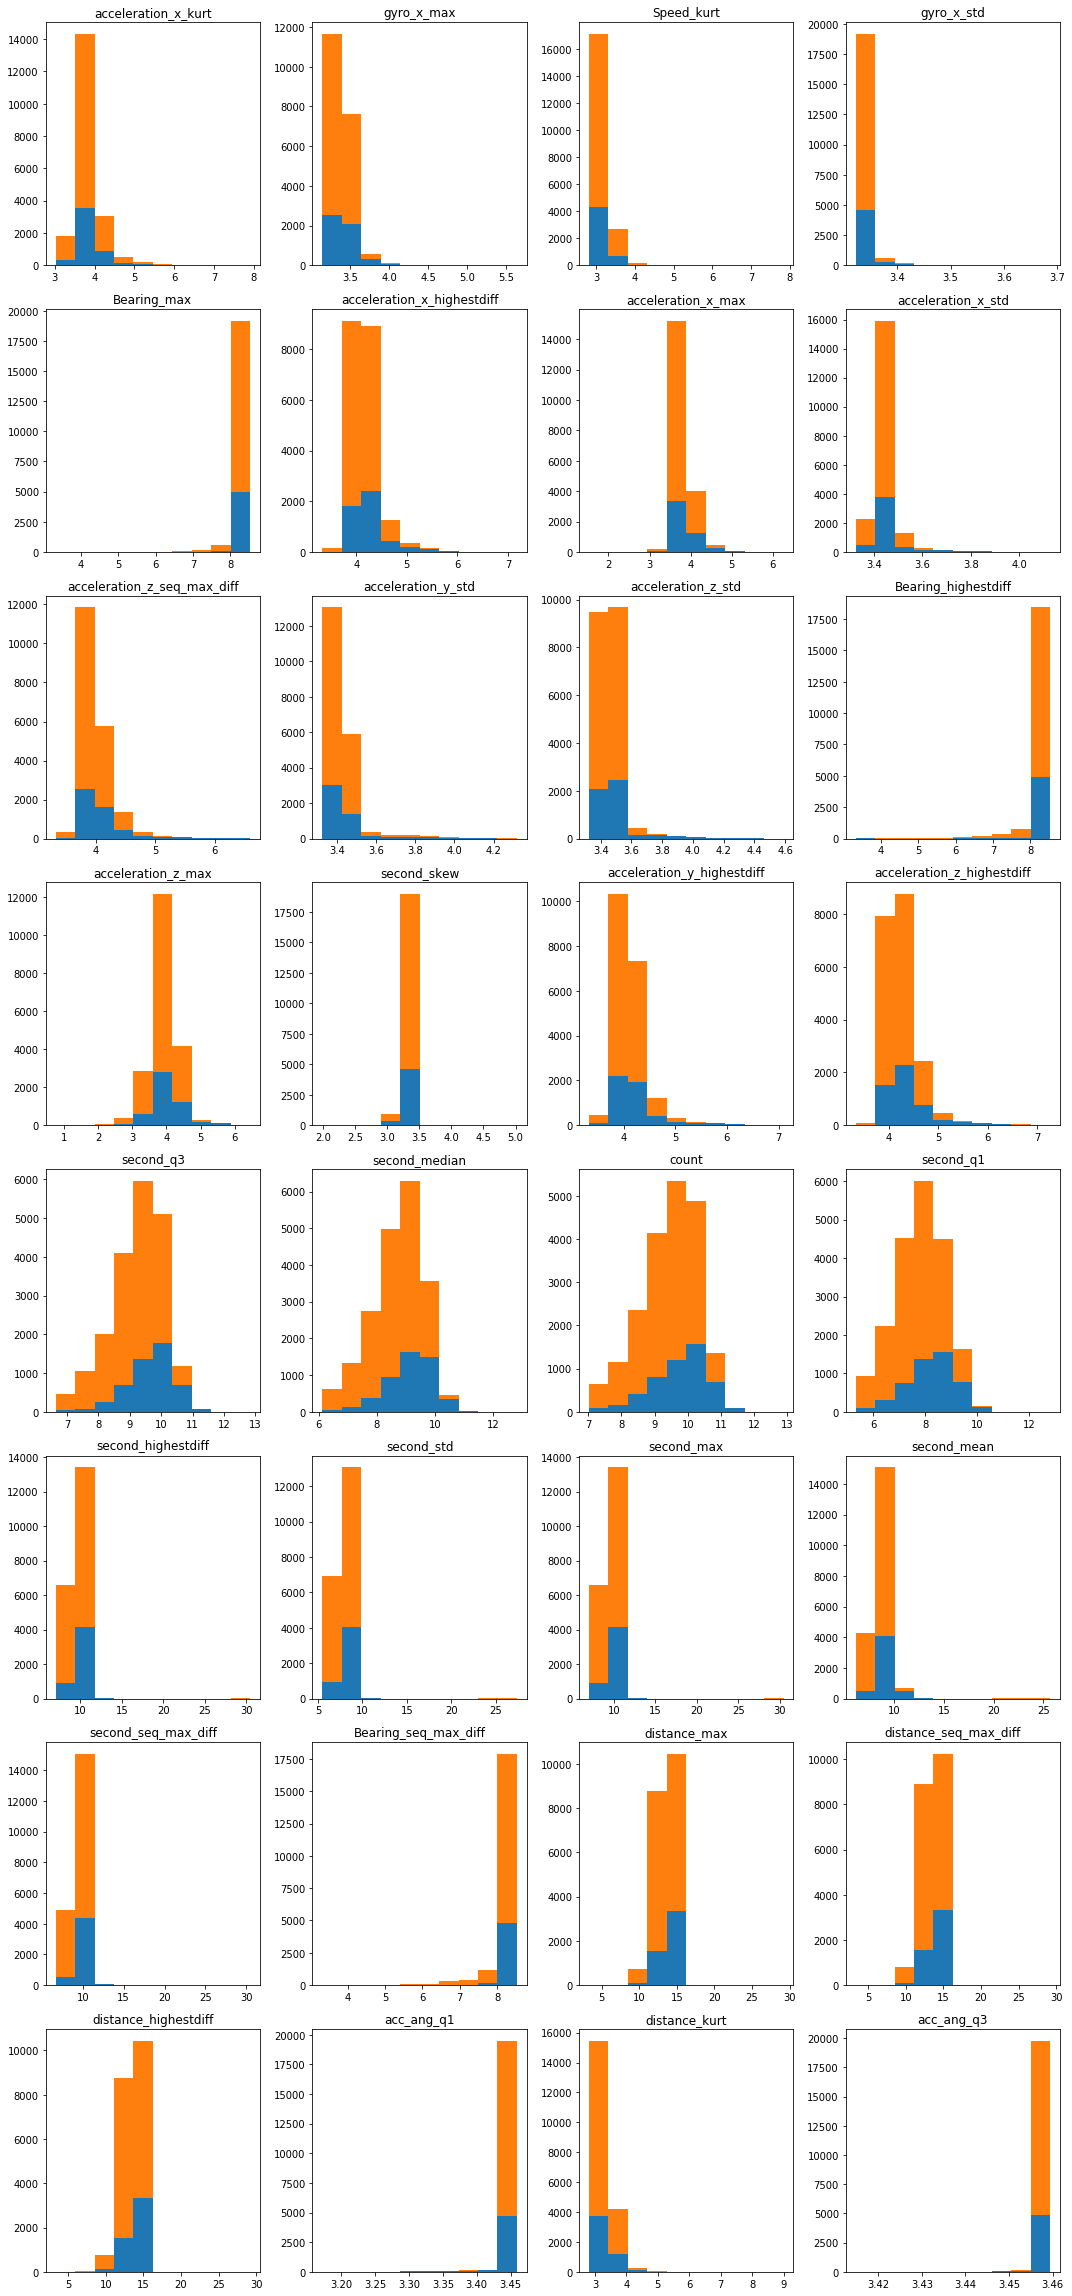

In [240]:
# Some did better while other not quite affected
stacked_plot_4(agg_table[['label']].join(np.log2(agg_table[feature_treat[:-1]]+10)), feature_treat[:-1], 8,4 )

That is the end of my EDA for this data. I am going to make other version of the data. It will be a long big tensor like in the case of text. The idea here is data has some kind of sequential pattern that result in danger or not. I will not do any further analysis for the sequential version of the data since there is not much that i can do. Instead i will use RNN method simmilar with analyzing sentiment of a text. The modelling part will be in the next notebook. 